In [ ]:
colabimport pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving soc-sign-bitcoinotc.csv to soc-sign-bitcoinotc (1).csv


In [ ]:
import pandas as pd
import io

# Use the filename as the key to access the contents of the file.
filename = next(iter(uploaded.keys()))
df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None, names=['Source', 'Target', 'Rating', 'Time'])
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df = df[(df['Time'].dt.year >= 2011) & (df['Time'].dt.year <= 2015)]

## **For -10 Group**

In [ ]:

user_counts_df = pd.DataFrame(df['Target'].value_counts())
user_counts_df.reset_index(inplace=True)
user_counts_df.columns = ['Target', 'Count']

# Create DataFrame for count of times the rating was -10 for each target
rating_minus_10_df = df[df['Rating'] == -10].groupby('Target').size().reset_index(name='Rating_-10_Count')

# Merge the two DataFrames
merged_df = pd.merge(user_counts_df, rating_minus_10_df, on='Target', how='left').fillna(0)


In [ ]:
filtered_df = merged_df[(merged_df['Count'] >= 10) &
                        ((merged_df['Rating_-10_Count'] / merged_df['Count']) >= 0.5)]

# Create a list of 'Target' values that satisfy the conditions
target_list = filtered_df['Target'].tolist()

In [ ]:
filtered_source_df = df[df['Source'].isin(target_list)]

In [ ]:
# Calculate average rating for the overall DataFrame
overall_avg_rating = filtered_source_df['Rating'].mean()

# Calculate average rating where target is in target_list
target_in_list_avg_rating = filtered_source_df[filtered_source_df['Target'].isin(target_list)]['Rating'].mean()

# Calculate average rating where target is not in target_list
target_not_in_list_avg_rating = filtered_source_df[~filtered_source_df['Target'].isin(target_list)]['Rating'].mean()

print("Overall Average Rating:", overall_avg_rating)
print("Average Rating where Target is in Target List:", target_in_list_avg_rating)
print("Average Rating where Target is not in Target List:", target_not_in_list_avg_rating)

Overall Average Rating: -3.1474654377880182
Average Rating where Target is in Target List: 3.375
Average Rating where Target is not in Target List: -5.416149068322981


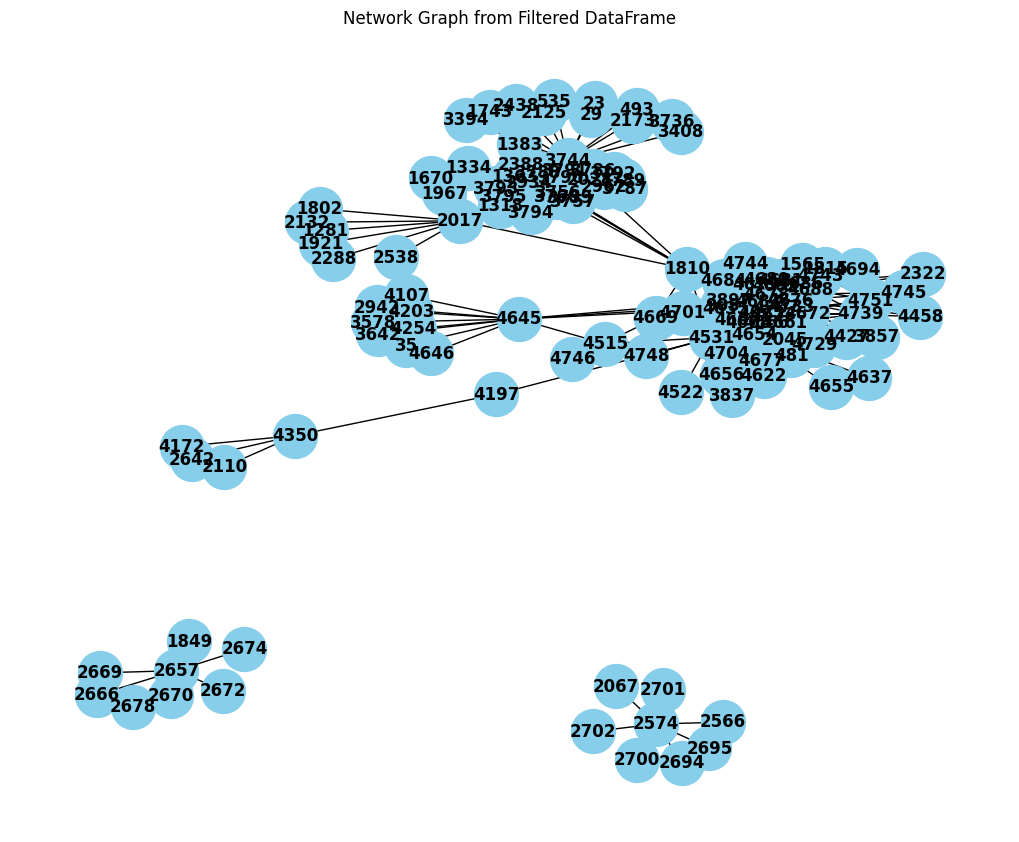

Maximum Core: 11
Maximum Clique Size: 8


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the filtered DataFrame
G = nx.from_pandas_edgelist(filtered_source_df,'Source', 'Target')
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=12, font_weight='bold')
plt.title('Network Graph from Filtered DataFrame')
plt.show()

max_core = nx.core_number(G)
max_core_value = max(max_core.values())

max_clique = nx.find_cliques(G)
max_clique_size = max(len(clique) for clique in max_clique)

# Display the results
print("Maximum Core:", max_core_value)
print("Maximum Clique Size:", max_clique_size)


## **For 10 Group**

In [ ]:
user_counts_df = pd.DataFrame(df['Target'].value_counts())
user_counts_df.reset_index(inplace=True)
user_counts_df.columns = ['Target', 'Count']

# Create DataFrame for count of times the rating was -10 for each target
rating_10_df = df[df['Rating'] == 10].groupby('Target').size().reset_index(name='Rating_10_Count')

# Merge the two DataFrames
merged_df = pd.merge(user_counts_df, rating_10_df, on='Target', how='left').fillna(0)

In [ ]:
filtered_df = merged_df[(merged_df['Count'] >= 10) &
                        ((merged_df['Rating_10_Count'] / merged_df['Count']) >= 0.5)]

# Create a list of 'Target' values that satisfy the conditions
target_list = filtered_df['Target'].tolist()

In [ ]:
target_list

[]

In [ ]:
filtered_source_df = df[df['Source'].isin(target_list)]

In [ ]:
# Calculate average rating for the overall DataFrame
overall_avg_rating = filtered_source_df['Rating'].mean()

# Calculate average rating where target is in target_list
target_in_list_avg_rating = filtered_source_df[filtered_source_df['Target'].isin(target_list)]['Rating'].mean()

# Calculate average rating where target is not in target_list
target_not_in_list_avg_rating = filtered_source_df[~filtered_source_df['Target'].isin(target_list)]['Rating'].mean()

print("Overall Average Rating:", overall_avg_rating)
print("Average Rating where Target is in Target List:", target_in_list_avg_rating)
print("Average Rating where Target is not in Target List:", target_not_in_list_avg_rating)

Overall Average Rating: nan
Average Rating where Target is in Target List: nan
Average Rating where Target is not in Target List: nan
